#Visualisasi Hasil Prediksi Model

## Plot Hasil

#New Loading

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from cv2 import imshow
from PIL import Image
from imutils import paths
import random
import os
from sklearn.preprocessing import MultiLabelBinarizer

print(tf.__version__)

2.12.0


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi/Program CNN/DenseNet/Saved Model/new_densenet169_30_tipe_model_6.h5')
# model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi/Program CNN/ResNet/Saved Model/new_resnet152_30_warna_1_3CAT.h5')
# model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi/Program CNN/MobileNetV2/Saved Model/new_mobilenetv2_30_warna_1_3CAT.h5')
# model = tf.keras.models.load_model('/content/drive/MyDrive/Skripsi/Program CNN/VGG19/Saved Model/new_vgg19_30_warna_1_3CAT.h5')



In [4]:
prediction_dict = {0: "Boulder", 1: "Branching", 2: "Table"} #Klasifikasi Tipe

In [5]:
def img_load(imagePaths):
  # random shuffle
  random.seed(42)
  random.shuffle(imagePaths)

  data = []
  labels = []
  image_dims = (224, 224, 3)


  for imagePath in imagePaths:
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (image_dims[1], image_dims[0]))
      image = img_to_array(image)
      data.append(image)
      l = label = imagePath.split(os.path.sep)[-2].split("_")
      labels.append(l)

  data = np.array(data, dtype="float") / 255.0
  labels = np.array(labels)
  print("{} images ({:.2f}MB)".format(len(imagePaths), data.nbytes / (1024 * 1000.0)))

  data = np.array(data)
  label = np.array(labels)
  print(data.shape)

  mlb = MultiLabelBinarizer()
  labels = mlb.fit_transform(labels)
  # total 3 labels
  print("class labels:")
  for (i, label) in enumerate(mlb.classes_):
      print("{}. {}".format(i+1, label))
  return data,labels

In [6]:
!pip install imutils
from imutils import paths
bs = 8
lr = 0.001
size = (224, 224)
shape = (224,224, 3)
epochs = 20
class_number = 3

In [49]:
def plotimage2(imagePath,testY,i):
  img = np.asarray(Image.open(imagePath))
  # label= testY.argmax(axis=1)
  image = cv2.imread(imagePath)
  # call imshow() using plt object
  plt.figure(facecolor='lime')
  plt.imshow(img)
  plt.axis('off')
  # display that image
  image = cv2.resize(image, (224, 224))
  cv2_imshow(image)

  print('=====================================================')

  idx=maxindex[i]
  label=trueIdx[i]
  # txt="Ground-Truth: {} \nPredicted: {} \nProbability: {:.5%}".format(prediction_dict[label],prediction_dict[idx],predictions[i][idx])

  txt="Predicted: {}".format(prediction_dict[idx])
  txtvar=plt.figtext(0.5, 0.05, txt, wrap=True, horizontalalignment='center', fontsize=18)
  plt.savefig("/content/drive/MyDrive/Skripsi/Program CNN/Load Model/Gambar Prediksi Model/Extra/Data Contoh/{} {}.png".format(i, prediction_dict[idx]),dpi=300,bbox_inches="tight")
  plt.show()
  txtvar.remove()
  print('=====================================================')

In [16]:
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Data Lapangan Bersih tipe/7 Juni")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Data Lapangan Bersih tipe/8 Juni titik 1")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Data Lapangan Bersih tipe/8 Juni titik 2")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Data Lapangan Bersih tipe/8 Juni titik 3")))
# imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Data Lapangan Bersih tipe/9 Juni")))
imagePaths = sorted(list(paths.list_images("/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Dummy2")))


random.seed(42)
random.shuffle(imagePaths)


In [17]:
testX,testY= img_load(imagePaths)

1 images (1.18MB)
(1, 224, 224, 3)
class labels:
1. Dummy2


In [18]:
predictions = model.predict(testX,batch_size=bs)
maxindex = np.argmax(predictions,axis=1)
trueIdx=testY.argmax(axis=1)


1/1 [==============================] - 0s 195ms/step


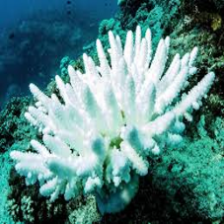

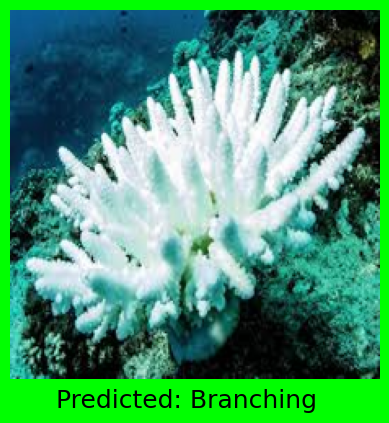

/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Dummy2/Copy of Copy of 231.png


In [50]:
i=0
for imagePath in imagePaths:
    l = imagePath.split(os.path.sep)[-2].split("_")
    label = l[0]
    img_path = imagePath
    plotimage2(img_path,testY,i)
    i+=1

# img_path = r"/content/drive/MyDrive/Skripsi/Dataset Terumbu Karang/Dataset/Data Tipe/Data Lapangan Bersih semua 2/Boulder/P6070002.JPG"
print(img_path)